In [1]:
#import common packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
train = pd.read_parquet('../input/kaggle-pog-series-s01e01/train.parquet')
test = pd.read_parquet('../input/kaggle-pog-series-s01e01/test.parquet')
sample_sub = pd.read_csv('../input/kaggle-pog-series-s01e01/sample_submission.csv')

In [3]:
train.shape,test.shape

((92275, 20), (5800, 16))

In [4]:
#glimpse for train
train.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,3C66w5Z0ixs_2020-08-12,NaN,True,0.103596
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",M9Pmf9AB4Mo_2020-08-12,NaN,True,0.061611
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,J78aPJ3VyNs_2020-08-12,NaN,True,0.173523
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,kXLn3HkpjaA_2020-08-12,NaN,True,0.046804
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,VIUo6yapDbc_2020-08-12,NaN,True,0.040753


In [5]:
train.shape

(92275, 20)

In [6]:
print(len(train.channelId.unique()))
print(len(train.categoryId.unique()))
print(len(train.video_id.unique()))

4563
15
16969


In [7]:
train.describe()

,categoryId,view_count,likes,dislikes,comment_count,duration_seconds,target
count,92275.000000,9.227500e+04,9.227500e+04,92275.000000,9.227500e+04,90099.000000,92275.000000
mean,18.733416,2.779091e+06,1.521223e+05,3110.977307,1.373574e+04,760.614602,0.057060
std,6.866404,7.364113e+06,4.374777e+05,13342.743386,9.672682e+04,5816.818926,0.040373
min,1.000000,3.851000e+04,0.000000e+00,0.000000,0.000000e+00,3.000000,0.000000
25%,17.000000,5.312440e+05,2.136300e+04,368.000000,1.692000e+03,184.000000,0.028066
50%,20.000000,1.100045e+06,5.169200e+04,852.000000,3.856000e+03,446.000000,0.050784
75%,24.000000,2.482274e+06,1.312825e+05,2239.000000,9.322000e+03,854.000000,0.075265
max,29.000000,2.644074e+08,1.602153e+07,879354.000000,6.738537e+06,485620.000000,0.433503


In [8]:
#checking train and test columns type
train.dtypes, test.dtypes

(video_id                          object
 title                             object
 publishedAt          datetime64[ns, UTC]
 channelId                         object
 channelTitle                      object
 categoryId                         int64
 trending_date                     object
 tags                              object
 view_count                         int64
 likes                              int64
 dislikes                           int64
 comment_count                      int64
 thumbnail_link                    object
 comments_disabled                   bool
 ratings_disabled                    bool
 description                       object
 id                                object
 duration_seconds                 float64
 has_thumbnail                       bool
 target                           float64
 dtype: object,
 video_id                          object
 title                             object
 publishedAt          datetime64[ns, UTC]
 channelId        

In [9]:
#dealing with missing values
#function to find Missing Value in every columns
def get_missing_value(df):
    mis_val = df.isnull().sum()
    tot_val = df.shape[0]
    mis_percentage = round((100 * mis_val / tot_val),2)
    miss_tab = pd.concat([mis_val, mis_percentage], axis=1)
    miss_tab_col_name = miss_tab.rename(columns = {0 : 'Row With Missing Value', 1 : 'Percentage (%)'})
    miss_tab_col_name = miss_tab_col_name.sort_values('Percentage (%)',ascending=False)
    return miss_tab_col_name

In [10]:
get_missing_value(train)

,Row With Missing Value,Percentage (%)
duration_seconds,2176,2.36
description,1476,1.60
video_id,0,0.00
title,0,0.00
has_thumbnail,0,0.00
id,0,0.00
ratings_disabled,0,0.00
comments_disabled,0,0.00
thumbnail_link,0,0.00
comment_count,0,0.00


In [11]:
get_missing_value(test)

,Row With Missing Value,Percentage (%)
description,409,7.05
duration_seconds,20,0.34
video_id,0,0.00
title,0,0.00
publishedAt,0,0.00
channelId,0,0.00
channelTitle,0,0.00
categoryId,0,0.00
trending_date,0,0.00
tags,0,0.00


In [12]:
#fill missing column with mean (only for numerical columns)
train['duration_seconds'].fillna(train['duration_seconds'].mean(), inplace=True)
test['duration_seconds'].fillna(test['duration_seconds'].mean(), inplace=True)

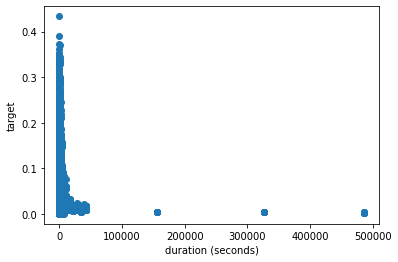

In [13]:
#plotting duration_seconds vs target
plt.scatter(train['duration_seconds'],
           train['target'])
plt.xlabel('duration (seconds)')
plt.ylabel('target')
plt.show()

In [14]:
#removing outliers (i assume that duration > 100000 = outliers)
train = train[train['duration_seconds']<100000]

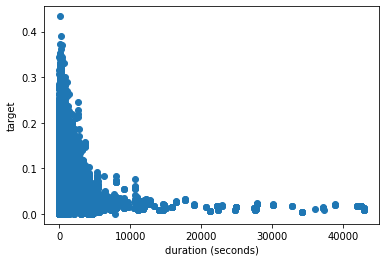

In [15]:
#plot again duration_seconds vs target
plt.scatter(train['duration_seconds'],
           train['target'])
plt.xlabel('duration (seconds)')
plt.ylabel('target')
plt.show()

In [16]:
#converting trending_date column type to datetime
train['trending_date'] = pd.to_datetime(train['trending_date'],utc=True)
test['trending_date'] = pd.to_datetime(test['trending_date'],utc=True)

In [17]:
#dropping isTest column
test.drop('isTest',axis=1,inplace=True)
#dropping columns in train that doesnt exist in test
#train.drop(['view_count','likes','dislikes','comment_count',],axis=1,inplace=True)
#checking columns
len(train.columns),len(test.columns)

(20, 15)

<AxesSubplot:xlabel='days_age', ylabel='target'>

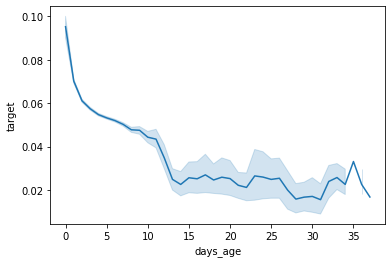

In [18]:
#checking if video's age affects the target
train['days_age']=(train['trending_date'].dt.date - train['publishedAt'].dt.date).dt.days
test['days_age']=(test['trending_date'].dt.date - test['publishedAt'].dt.date).dt.days

#plotting videos age vs target
sns.lineplot(train['days_age'],
           train['target'])

as you can see that new released video has more high target than old video

<AxesSubplot:xlabel='trend_dow', ylabel='target'>

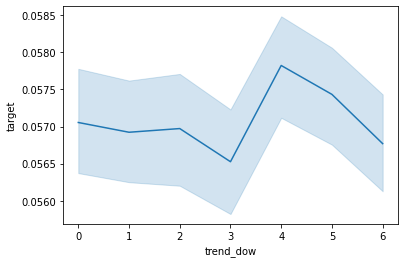

In [19]:
#checking if the trending day affects the target
train['trend_dow'] = train.trending_date.dt.dayofweek
test['trend_dow'] = test.trending_date.dt.dayofweek

sns.lineplot(train['trend_dow'],
           train['target'])

<AxesSubplot:xlabel='pub_dow', ylabel='target'>

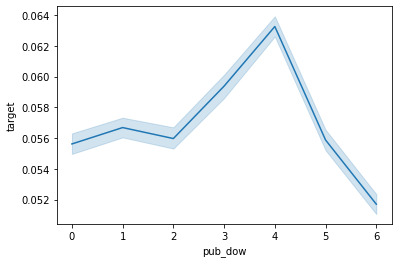

In [20]:
#and also published day
train['pub_dow'] = train.publishedAt.dt.dayofweek
test['pub_dow'] = test.publishedAt.dt.dayofweek

sns.lineplot(train['pub_dow'],
           train['target'])

desc : 0=Monday,1=Tuesday,2=Wednesday,3=Thrusday,4=Friday,5=Saturday,6=Sunday
conclu : day of week of trending dan published video affects target

<AxesSubplot:xlabel='pub_hour', ylabel='target'>

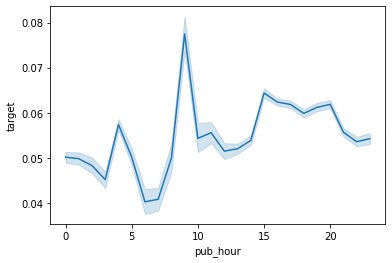

In [21]:
#checking if published hour affects target
train['pub_hour'] = train.publishedAt.dt.hour
test['pub_hour'] = test.publishedAt.dt.hour

sns.lineplot(train['pub_hour'],
           train['target'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0'),
  Text(21, 0, '21.0'),
  Text(22, 0, '23.0'),
  Text(23, 0, '27.0'),
  Text(24, 0, '29.0'),
  Text(25, 0, '31.0'),
  Text(26, 0, '39.0'),
  Text(27, 0, '41.0'),
  Text(28, 0, '42.0'),
  Text(29, 0, '43.0'),
  Text(30, 0, '121.0')])

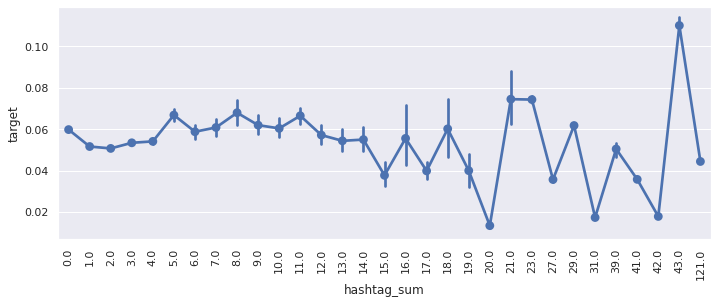

In [22]:
#checking if hashtag in title affects target
train['hashtag_sum'] = train['description'].str.count('#')
train['hashtag_sum'] = train['hashtag_sum'].fillna(0)

test['hashtag_sum'] = test['description'].str.count('#')
test['hashtag_sum'] = test['hashtag_sum'].fillna(0)

sns.set(rc={'figure.figsize':(11.7,4.27)})
sns.pointplot(train['hashtag_sum'],
           train['target'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0'),
  Text(21, 0, '21.0'),
  Text(22, 0, '22.0'),
  Text(23, 0, '23.0'),
  Text(24, 0, '24.0'),
  Text(25, 0, '25.0'),
  Text(26, 0, '26.0'),
  Text(27, 0, '27.0'),
  Text(28, 0, '29.0'),
  Text(29, 0, '31.0'),
  Text(30, 0, '32.0'),
  Text(31, 0, '33.0'),
  Text(32, 0, '36.0'),
  Text(33, 0, '38.0'),
  Text(34, 0, '39.0'),
  Text(35, 0, '41.0'),
  Text(36,

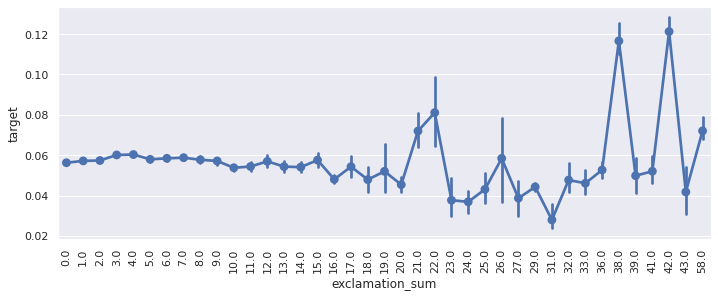

In [23]:
#checking if ! in title affects target
train['exclamation_sum'] = train['description'].str.count('!')
train['exclamation_sum'] = train['exclamation_sum'].fillna(0)

test['exclamation_sum'] = test['description'].str.count('!')
test['exclamation_sum'] = test['exclamation_sum'].fillna(0)

sns.set(rc={'figure.figsize':(11.7,4.27)})
sns.pointplot(train['exclamation_sum'],
           train['target'])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='desc_len', ylabel='target'>

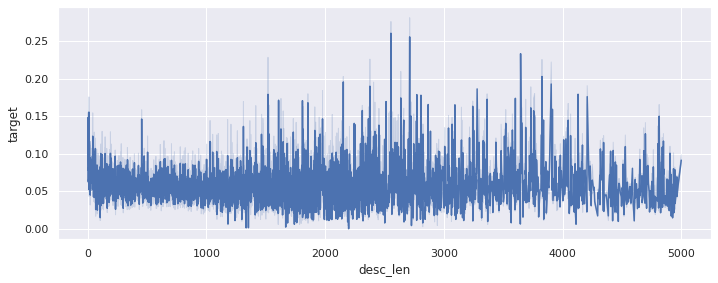

In [24]:
#checking if description length affect target
train['desc_len'] = train['description'].str.len()
train['desc_len'] = train['desc_len'].fillna(0)

test['desc_len'] = test['description'].str.len()
test['desc_len'] = test['desc_len'].fillna(0)

sns.set(rc={'figure.figsize':(11.7,4.27)})
sns.lineplot(train['desc_len'],
           train['target'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31'),
  Text(31, 0, '32'),
  Text(32, 0, '33'),
  Te

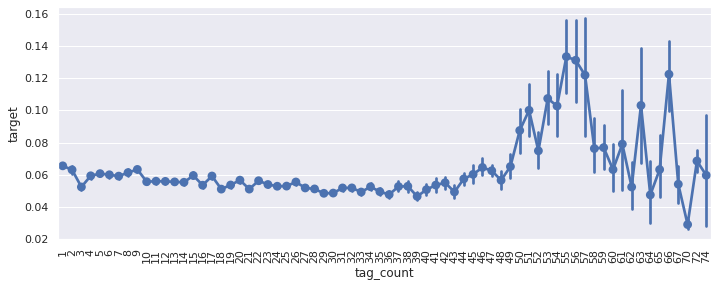

In [25]:
#checking if tags affects target
train['tag_count'] = train['tags'].apply(lambda x: len(x.split('|')))
train['tag_count'] = train['tag_count'].fillna(0)

test['tag_count'] = test['tags'].apply(lambda x: len(x.split('|')))
test['tag_count'] = test['tag_count'].fillna(0)

sns.set(rc={'figure.figsize':(11.7,4.27)})
sns.pointplot(train['tag_count'],
           train['target'])
plt.xticks(rotation=90)

In [26]:
#checking if language in tags affects target
import regex

#korean language
def is_hangul(value):
    if regex.search(r'\p{IsHangul}', value):
        return True
    return False
train['tags_korean'] = [is_hangul(a)*1 for a in train.tags]
test['tags_korean'] = [is_hangul(a)*1 for a in test.tags]

#japanese language
def is_japanese(value):
    if regex.search(r'[\p{Hiragana}\p{Katakana}\p{Han}]', value):
        return True
    return False
train['tags_japanese'] = [is_japanese(a)*1 for a in train.tags]
test['tags_japanese'] = [is_japanese(a)*1 for a in test.tags]

#russian language
def is_russian(value):
    if regex.search(r'[а-яА-Я]', value):
        return True
    return False
train['tags_russian'] = [is_russian(a)*1 for a in train.tags]
test['tags_russian'] = [is_russian(a)*1 for a in test.tags]

#arabian language
def is_arab(value):
    if regex.search(r'[ا-ي]', value):
        return True
    return False
train['tags_arab'] = [is_arab(a)*1 for a in train.tags]
test['tags_arab'] = [is_arab(a)*1 for a in test.tags]

#mandarin language
def is_mandarin(value):
    if regex.search(r'[\u4e00-\u9fff]+', value):
        return True
    return False
train['tags_mandarin'] = [is_mandarin(a)*1 for a in train.tags]
test['tags_mandarin'] = [is_mandarin(a)*1 for a in test.tags]

#hindi language
def is_hindi(value):
    if regex.search(r'[^(^a-zA-Z-0-9)]+\d+', value):
        return True
    return False
train['tags_indi'] = [is_hindi(a)*1 for a in train.tags]
test['tags_indi'] = [is_hindi(a)*1 for a in test.tags]

Text(0.5, 0, '0=no 1=yes')

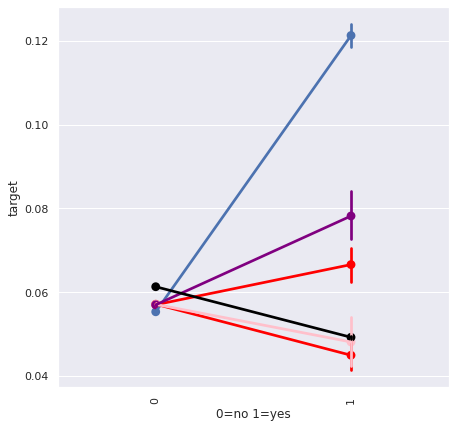

In [27]:
sns.set(rc={'figure.figsize':(7,7)})
sns.pointplot(train['tags_korean'],
           train['target'],
              labels='korean')
plt.xticks(rotation=90)

sns.pointplot(train['tags_japanese'],
           train['target'],
           color='red',
              labels='japan')

sns.pointplot(train['tags_arab'],
           train['target'],
           color='red',
              labels='arab')

sns.pointplot(train['tags_russian'],
           train['target'],
           color='pink',
              labels='russia')

sns.pointplot(train['tags_mandarin'],
           train['target'],
           color='purple',
              labels='mandarin')

sns.pointplot(train['tags_indi'],
           train['target'],
           color='black',
              labels='hindi')

plt.xlabel('0=no 1=yes')

In [28]:
#because test dataset doesn't has 'likes', 'dislikes', 'view count', 'comment count' and 'target'
#we must assuming them as the mean of column in test dataset before we delete these columns

comment_grp_channel = train.groupby('channelId')['comment_count'].mean()
comment_grp_cat = train.groupby('categoryId')['comment_count'].mean()

target_grp_channel = train.groupby('channelId')['target'].mean()
target_grp_cat = train.groupby('categoryId')['target'].mean()

view_grp_channel = train.groupby('channelId')['view_count'].mean()
view_grp_cat = train.groupby('categoryId')['view_count'].mean()

likes_grp_channel = train.groupby('channelId')['likes'].mean()
likes_grp_cat = train.groupby('categoryId')['likes'].mean()

dislikes_grp_channel = train.groupby('channelId')['dislikes'].mean()
dislikes_grp_cat = train.groupby('categoryId')['dislikes'].mean()

In [29]:
len(comment_grp_cat.index.unique())

15

In [30]:
len(test.categoryId.unique())

13

In [31]:
#apply prior code to test and train dataset
def column_manipulation(df) :
    df['comment_grp_channel']=df['channelId'].map(comment_grp_channel)
    df['comment_grp_cat']=df['categoryId'].map(comment_grp_cat)
    
    df['target_grp_channel']=df['channelId'].map(target_grp_channel)
    df['target_grp_cat']=df['categoryId'].map(target_grp_cat)
    
    df['view_grp_channel']=df['channelId'].map(view_grp_channel)
    df['view_grp_cat']=df['categoryId'].map(view_grp_cat)
    
    df['likes_grp_channel']=df['channelId'].map(likes_grp_channel)
    df['likes_grp_cat']=df['categoryId'].map(likes_grp_cat)
    
    df['dislikes_grp_channel']=df['channelId'].map(dislikes_grp_channel)
    df['dislikes_grp_cat']=df['categoryId'].map(dislikes_grp_cat)
    
#apply
column_manipulation(train)
column_manipulation(test)

In [32]:
train.columns,len(train.columns)

(Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
        'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
        'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
        'ratings_disabled', 'description', 'id', 'duration_seconds',
        'has_thumbnail', 'target', 'days_age', 'trend_dow', 'pub_dow',
        'pub_hour', 'hashtag_sum', 'exclamation_sum', 'desc_len', 'tag_count',
        'tags_korean', 'tags_japanese', 'tags_russian', 'tags_arab',
        'tags_mandarin', 'tags_indi', 'comment_grp_channel', 'comment_grp_cat',
        'target_grp_channel', 'target_grp_cat', 'view_grp_channel',
        'view_grp_cat', 'likes_grp_channel', 'likes_grp_cat',
        'dislikes_grp_channel', 'dislikes_grp_cat'],
       dtype='object'),
 44)

In [33]:
test.columns,len(test.columns)

(Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
        'categoryId', 'trending_date', 'tags', 'thumbnail_link',
        'comments_disabled', 'ratings_disabled', 'description', 'id',
        'duration_seconds', 'has_thumbnail', 'days_age', 'trend_dow', 'pub_dow',
        'pub_hour', 'hashtag_sum', 'exclamation_sum', 'desc_len', 'tag_count',
        'tags_korean', 'tags_japanese', 'tags_russian', 'tags_arab',
        'tags_mandarin', 'tags_indi', 'comment_grp_channel', 'comment_grp_cat',
        'target_grp_channel', 'target_grp_cat', 'view_grp_channel',
        'view_grp_cat', 'likes_grp_channel', 'likes_grp_cat',
        'dislikes_grp_channel', 'dislikes_grp_cat'],
       dtype='object'),
 39)

In [34]:
train.shape,test.shape

((92253, 44), (5800, 39))

In [35]:
get_missing_value(train)

,Row With Missing Value,Percentage (%)
description,1476,1.6
video_id,0,0.0
pub_hour,0,0.0
exclamation_sum,0,0.0
desc_len,0,0.0
tag_count,0,0.0
tags_korean,0,0.0
tags_japanese,0,0.0
tags_russian,0,0.0
tags_arab,0,0.0


In [36]:
get_missing_value(test)

,Row With Missing Value,Percentage (%)
comment_grp_channel,1202,20.72
dislikes_grp_channel,1202,20.72
likes_grp_channel,1202,20.72
view_grp_channel,1202,20.72
target_grp_channel,1202,20.72
description,409,7.05
tags_mandarin,0,0.00
tag_count,0,0.00
tags_korean,0,0.00
tags_japanese,0,0.00


In [37]:
#dealing with missing value - 2
test['comment_grp_channel'].fillna(test['comment_grp_channel'].mean(), inplace=True)
test['dislikes_grp_channel'].fillna(test['dislikes_grp_channel'].mean(), inplace=True)
test['likes_grp_channel'].fillna(test['likes_grp_channel'].mean(), inplace=True)
test['view_grp_channel'].fillna(test['view_grp_channel'].mean(), inplace=True)
test['target_grp_channel'].fillna(test['target_grp_channel'].mean(), inplace=True)

#dropping description column
train.drop('description',axis=1,inplace=True)
test.drop('description',axis=1,inplace=True)

#check missing value
train.isna().values.any(), test.isna().values.any()

(False, False)

In [38]:
train.dtypes

video_id                             object
title                                object
publishedAt             datetime64[ns, UTC]
channelId                            object
channelTitle                         object
categoryId                            int64
trending_date           datetime64[ns, UTC]
tags                                 object
view_count                            int64
likes                                 int64
dislikes                              int64
comment_count                         int64
thumbnail_link                       object
comments_disabled                      bool
ratings_disabled                       bool
id                                   object
duration_seconds                    float64
has_thumbnail                          bool
target                              float64
days_age                              int64
trend_dow                             int64
pub_dow                               int64
pub_hour                        

In [39]:
test.dtypes

video_id                             object
title                                object
publishedAt             datetime64[ns, UTC]
channelId                            object
channelTitle                         object
categoryId                            int64
trending_date           datetime64[ns, UTC]
tags                                 object
thumbnail_link                       object
comments_disabled                      bool
ratings_disabled                       bool
id                                   object
duration_seconds                    float64
has_thumbnail                          bool
days_age                              int64
trend_dow                             int64
pub_dow                               int64
pub_hour                              int64
hashtag_sum                         float64
exclamation_sum                     float64
desc_len                            float64
tag_count                             int64
tags_korean                     

In [40]:
train = train.drop_duplicates()

In [41]:
#import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [42]:
#label encoding
enc_feat = ['comments_disabled','ratings_disabled','tags_korean','tags_japanese',
           'tags_russian','tags_arab','tags_mandarin','tags_indi','categoryId',
           'trend_dow','pub_dow','pub_hour','has_thumbnail']
for i in train[enc_feat]:
    le = LabelEncoder() 
    le.fit(list(train[i].values)) 
    train[i] = le.transform(list(train[i].values))
for i in test[enc_feat]:
    le = LabelEncoder() 
    le.fit(list(test[i].values)) 
    test[i] = le.transform(list(test[i].values))

In [43]:
#set features and target
FEATURES = ['categoryId','duration_seconds','comments_disabled',
            'ratings_disabled','has_thumbnail','days_age',
           'trend_dow','pub_dow','pub_hour',
           'hashtag_sum','exclamation_sum','desc_len',
           'tag_count','exclamation_sum','desc_len',
           'hashtag_sum','tags_korean','tags_japanese',
           'tags_russian','tags_arab','tags_mandarin',
           'tags_indi','comment_grp_channel','comment_grp_cat',
           'target_grp_channel','target_grp_cat','view_grp_channel',
           'view_grp_cat','likes_grp_channel','likes_grp_cat',
           'dislikes_grp_channel','dislikes_grp_cat']
TARGET = ['target']

#define X and y
X = train[FEATURES]
y = train[TARGET]

#split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [44]:
y_val

,target
62583,0.043941
41036,0.052103
7733,0.111281
41020,0.086476
77452,0.015853
...,...
82023,0.015314
84397,0.050921
24109,0.045189
54642,0.009326


In [45]:
#using LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_val)
lr_acc = mean_absolute_error(y_val,lr_pred)
lr_acc

0.010705727954361137

In [46]:
#using KNN
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_val)
knn_acc = mean_absolute_error(y_val,knn_pred)
knn_acc

0.007774155549484104

In [47]:
#using RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_pred = rfr.predict(X_val)
rfr_acc = mean_absolute_error(y_val,rfr_pred)
rfr_acc

0.0065150944100942736

In [48]:
#using SVR
SVR = SVR()
SVR.fit(X_train,y_train)
SVR_pred = SVR.predict(X_val)
SVR_acc = mean_absolute_error(y_val,SVR_pred)
SVR_acc

0.053118090023411176

In [49]:
#checking RMSE for RandomForestRegressor with different n_estimators
klist = [60,70,80,90,100,110,120,130,140,150]
MAE = []
for k in klist:
    rfrr = RandomForestRegressor(n_estimators=k)
    rfrr.fit(X_train,y_train)
    rfrr_pred = rfrr.predict(X_val)
    rfrr_MAE = mean_absolute_error(y_val,rfrr_pred)
    MAE.append(rfrr_MAE)

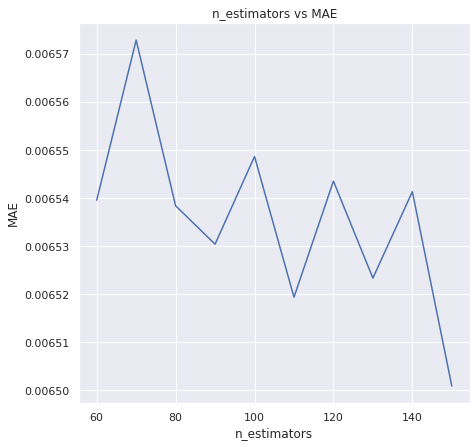

In [50]:
plt.plot(klist,
        MAE)
plt.title('n_estimators vs MAE')
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.show()

In [51]:
#check again if mae reduced or not
best_model = RandomForestRegressor(n_estimators=140)
best_model.fit(X_train,y_train)
best_predict = best_model.predict(X_val)
best_predict_acc = mean_absolute_error(y_val,best_predict)
best_predict_acc

0.006498770267305145

In [52]:
best_predict, y_val

(array([0.04874382, 0.04822455, 0.10816304, ..., 0.07357657, 0.01010487,
        0.05673565]),
          target
 62583  0.043941
 41036  0.052103
 7733   0.111281
 41020  0.086476
 77452  0.015853
 ...         ...
 82023  0.015314
 84397  0.050921
 24109  0.045189
 54642  0.009326
 27577  0.056252
 
 [18451 rows x 1 columns])

In [53]:
#predict test dataset
test_X = test[FEATURES]
testX_pred = best_model.predict(test_X)
testX_pred

array([0.09043122, 0.07956161, 0.09262218, ..., 0.05444706, 0.07297861,
       0.03956878])

In [54]:
test2 = pd.read_parquet('../input/kaggle-pog-series-s01e01/test.parquet')
test2.id.head()

0    _wNsZEqpKUA_2021-12-01
1    2jfbXZiE6Lc_2021-12-01
2    F1Hq8eVOMHs_2021-12-01
3    GQXVQmcGQUY_2021-12-01
4    n4XojTb6pfs_2021-12-01
Name: id, dtype: object

In [55]:
#submission
new_submission = pd.DataFrame({'id':test2.id, 'target': testX_pred})
new_submission

,id,target
0,_wNsZEqpKUA_2021-12-01,0.090431
1,2jfbXZiE6Lc_2021-12-01,0.079562
2,F1Hq8eVOMHs_2021-12-01,0.092622
3,GQXVQmcGQUY_2021-12-01,0.019918
4,n4XojTb6pfs_2021-12-01,0.088510
...,...,...
5795,hJfpCXAMYPM_2021-12-30,0.058998
5796,MbmTMEYnEzo_2021-12-30,0.060274
5797,VG7arSAYvQI_2021-12-30,0.054447
5798,SNb-g-hNYYs_2021-12-30,0.072979


In [56]:
#convert to csv
new_submission.to_csv('new_submission.csv',index=False)